In [ ]:
# Merged code for final data analysis & visulization

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
import requests
import json


In [2]:
properties_path= "raw_data/Property_postaladded.csv"

In [5]:
properties_data = pd.read_csv(properties_path)

In [6]:
properties_data.head(5)

,Address,AreaName,Price,lat,lng,postal_code,neighbourhood
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266,M9R 2N8,Etobicoke
1,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118,M5A 2P8,Toronto
2,"254A Monarch Park Ave Toronto, ON",Old East York,1488000,43.686375,-79.328918,M4J 4S5,East York
3,"3 Bracebridge Ave Toronto, ON",Old East York,599900,43.697842,-79.317368,M4C 2X6,East York
4,"#710 - 1080 Bay St Toronto, ON",Downtown,805900,43.666794,-79.388756,M5S 0A5,Old Toronto


In [7]:
homicide_path= "raw_data/Homicide_postaladded.csv"

In [8]:
homicide_data = pd.read_csv(homicide_path)

In [9]:
homicide_data.head(5) 

,Homicide_Year,Homicide_Lat,Homicide_Lng,Homicide_Neighbourhood,Homicide_Postal_Code,Homicide_Neighborhood2,Homicide_Postal_Group
0,2016,43.667374,-79.381638,Church-Yonge Corridor (75),M4Y 1L5,Old Toronto,M4Y
1,2016,43.705143,-79.529404,Weston (113),M9N 1Z2,North York,M9N
2,2016,43.742729,-79.540337,Humbermede (22),M9M 1N6,Toronto,M9M
3,2016,43.704571,-79.396797,Mount Pleasant West (104),M4S 1V5,Old Toronto,M4S
4,2016,43.657211,-79.404076,University (79),M5T 3A9,Old Toronto,M5T


In [10]:
#Group homicide records by neighborhoods 
homicide_hood =homicide_data.groupby("Homicide_Neighborhood2")
homicide_hood_count = homicide_hood["Homicide_Neighborhood2"].count()
homicide_hood_bar = pd.DataFrame({"Homicide Count":homicide_hood_count})
homicide_hood_bar

,Homicide Count
Homicide_Neighborhood2,
East York,4
Etobicoke,11
North York,9
Old Toronto,21
Scarborough,14
Toronto,15
York,1


In [11]:
homicide_hood=homicide_hood_bar.sort_values("Homicide Count",ascending=False)


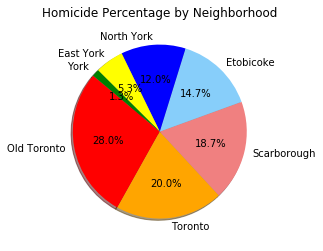

In [12]:
# Visualization 1) Homicide by Neighborhoods - Pie Chart 
sizes = homicide_hood['Homicide Count']
labels = homicide_hood.index
colors = ["red", "orange", "lightcoral", "lightskyblue","blue","yellow","green"]
explode = (0,0,0,1)
plt.title("Homicide Percentage by Neighborhood")
# Creates the pie chart based upon the values above
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("1_HomicideNeighborhoods_Pie", bbox_inches = 'tight')
plt.show()


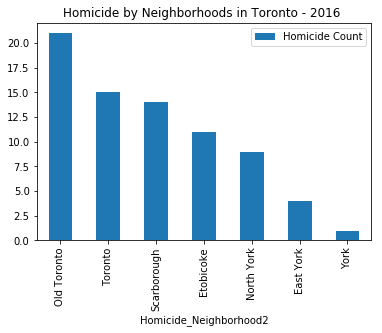

In [13]:
# Visualization 2) Homicide by Neighborhoods - Bar Chart 
homicide_hood.plot(kind='bar')
plt.title('Homicide by Neighborhoods in Toronto - 2016 ')
plt.savefig("2_HomicideNeighborhoods_Bar", bbox_inches = 'tight')

In [14]:
locations_homicide = homicide_data[["Homicide_Lat", "Homicide_Lng"]].astype(float)


In [15]:
# Visualization 3) Homicide Heatmap  
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)
fig = gmaps.figure()

#homicide_heat_layer = gmaps.heatmap_layer(locations_homicide,dissipating=False, max_intensity=100,
                                 #point_radius = 1)
homicide_heat_layer = gmaps.heatmap_layer(locations_homicide)
fig.add_layer(homicide_heat_layer)

fig



Figure(layout=FigureLayout(height='420px'))

In [16]:
# Visualization 4) Property Heatmap  
#create locations
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
locations_property = properties_data[["lat", "lng"]].astype(float)
colour = [
         'rgba(0, 255, 255, 0)',
         'rgba(0, 255, 255, 1)',
         'rgba(0, 191, 255, 1)',
         'rgba(0, 127, 255, 1)',
         'rgba(0, 63, 255, 1)',
         'rgba(0, 0, 255, 1)',
         'rgba(0, 0, 223, 1)',
         'rgba(0, 0, 191, 1)',
         'rgba(0, 0, 159, 1)',
         'rgba(0, 0, 127, 1)',
         'rgba(63, 0, 91, 1)',
         'rgba(127, 0, 63, 1)',
         'rgba(191, 0, 31, 1)',
         'rgba(255, 0, 0, 1)']

property_heat_layer = gmaps.heatmap_layer(locations_property, gradient=colour)
fig.add_layer(property_heat_layer)

fig


Figure(layout=FigureLayout(height='420px'))

In [17]:
#Visualization 5) Combined Homicide + Property Heatmap  
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)
fig = gmaps.figure()

#homicide_heat_layer = gmaps.heatmap_layer(locations_homicide,dissipating=False, max_intensity=100,
                                 #point_radius = 1)
homicide_heat_layer = gmaps.heatmap_layer(locations_homicide)
property_heat_layer = gmaps.heatmap_layer(locations_property, gradient=colour)
fig.add_layer(property_heat_layer)
fig.add_layer(homicide_heat_layer)
fig


Figure(layout=FigureLayout(height='420px'))

In [ ]:
propertiesbyhood = properties_data.groupby("neighbourhood")
price_avg = propertiesbyhood["Price"].mean()
propertiesbyhood = pd.DataFrame({"Average Price":price_avg})
propertiesbyhood = propertiesbyhood.reset_index()
propertiesbyhood

In [ ]:
#Group homicide records by neighborhoods
homicidebyhood = homicide_data.groupby("Homicide_Neighborhood2")
homicide_hood_count = homicidebyhood["Homicide_Neighborhood2"].count()
homicidebyhood = pd.DataFrame({"Homicide Count":homicide_hood_count})
homicidebyhood = homicidebyhood.reset_index()
homicidebyhood

In [ ]:
combined_df = homicidebyhood.merge(propertiesbyhood,left_on='Homicide_Neighborhood2', right_on='neighbourhood')
combined_df

In [ ]:
price_aver = combined_df['Average Price']
homicide_count = combined_df['Homicide Count']

In [ ]:
# Visualization 6) Property vs Homcide Scatter  
# Create a title, x label, and y label for our chart
plt.title("Homicide count vs Average House price")
plt.xlabel("Number of Homicide")
plt.ylabel("House price (Dollars)")

# Set the upper and lower limits of our y axis
# plt.ylim(180,620)

# Set the upper and lower limits of our x axis
# plt.xlim(11,26)

plt.scatter(homicide_count, price_aver, marker="s", facecolors="blue", edgecolors="black")

plt.savefig("6_Combined_Scatter", bbox_inches = 'tight')